# Análise Exploratória: Coasters e suas caractéristicas

**Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

**Carregando o arquivo csv em formado de DataFrame**

In [2]:
df = pd.read_csv('coaster_db.csv')

In [3]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


**Entendendo a tabela:**
- Do que se trata?
- Quais colunas compõem? 
- Existem linhas sem valor?
- Qual o Dtype de cada coluna? E se é preciso alguma alteração de tipo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [5]:
# Percebemos que opening_date_clean está como object quando deveria ser uma data
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [6]:
# Transfordmando uma coluna em númerico, neste caso não é necessário pois já está em inteiro
# df['year_introduced'] = pd.to_numeric(df['year_introduced'])

In [7]:
df.dtypes

coaster_name                             object
Length                                   object
Speed                                    object
Location                                 object
Status                                   object
Opening date                             object
Type                                     object
Manufacturer                             object
Height restriction                       object
Model                                    object
Height                                   object
Inversions                              float64
Lift/launch system                       object
Cost                                     object
Trains                                   object
Park section                             object
Duration                                 object
Capacity                                 object
G-force                                  object
Designer                                 object
Max vertical angle                      

In [8]:
# Quantas linhas vazias por coluna
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [9]:
# Estatística básica do dataframe
df.describe()

,Inversions,year_introduced,latitude,longitude,opening_date_clean,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,837,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,1994-07-25 07:06:39.999999872,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
min,0.000000,1884.000000,-48.261700,-123.035700,1884-06-16 00:00:00,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,1987-06-07 00:00:00,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,2000-04-22 00:00:00,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,2010-11-04 00:00:00,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,2022-03-01 00:00:00,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000
std,2.114073,23.475248,15.516596,72.285227,NaN,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998


In [10]:
# Descobrindo quais são as colunas e do que se trata
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

Caso fosse necessário remover uma coluna específica podereíamos seguir o comando abaixo:

In [11]:
# Exemplo de remoção de coluna
# df.drop(axis=1, columns='Opening date')


**Selecionando as colunas que queremos para analisar**

In [12]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
    'Opened', 
    #'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
    'latitude', 
    'longitude', 
    'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean' ]]

In [13]:
df.head()

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [14]:
# Exemplo de como poderíamos renomear as colunas
# df.rename(columns={'coaster_name' : 'Coaster_Name', 'year_introduced': 'Year_Introduced' })

In [15]:
# Renomeando colunas, mas colocando todas capitalizadas, sem precisar renomear uma por uma
df.columns = df.columns.str.capitalize()

In [16]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [17]:
# Indentificando valores faltantes
df.isna().sum()

Coaster_name             0
Location                 0
Status                 213
Manufacturer            59
Opened                1060
Year_introduced          0
Latitude               275
Longitude              275
Type_main                0
Opening_date_clean     250
Speed_mph              150
Height_ft              916
Inversions_clean         0
Gforce_clean           725
dtype: int64

In [18]:
# Localizando valores duplicados na tabela
df.loc[df.duplicated()]
# Não há valores com todas as colunas duplicadas, mas podem haver com uma ou outra coluna duplicada apenas

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean


In [19]:
df.loc[df.duplicated(subset='Coaster_name')]

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,NaN,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,NaN,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [20]:
df.query('Coaster_name == "Derby Racer" ')

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN


In [21]:
df.duplicated(subset=['Coaster_name', 'Location', 'Opening_date_clean']).sum()

97

In [22]:
# Dropando linhas em que as colunas: 'Coaster_name', 'Location', 'Opening_date_clean' estejam duplicadas
# Nosso novo df será um dataframe sem estas colunas que possuem valores duplicados
# Lembrando que por padrão a eliminação do duplicado só ocorre no segundo valor

In [23]:
df = df.loc[~df.duplicated(subset=['Coaster_name', 'Location', 'Opening_date_clean'])]

In [24]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [25]:
# Temos um dataframe bem mais enxuto agora
df.shape

(990, 14)

**Vamos analisar os anos com mais Coasters inauguradas**

In [26]:
grafico1 = df['Year_introduced'].value_counts().head(10)
grafico1

Year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: count, dtype: int64

<Axes: title={'center': 'Top Years Coasters Introduced'}, xlabel='Year', ylabel='Counts'>

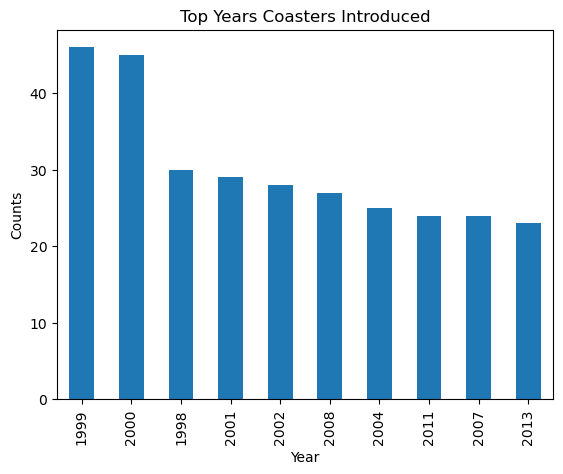

In [27]:
grafico1.plot.bar(title='Top Years Coasters Introduced', ylabel='Counts', xlabel='Year')

**Vamos analisar a densidade da velocidade das Coasters**

In [28]:
df['Speed_mph'].sort_values(ascending=False)

812     149.1
685     128.0
642     120.0
569     111.8
993     111.8
        ...  
1007      NaN
1032      NaN
1065      NaN
1068      NaN
1078      NaN
Name: Speed_mph, Length: 990, dtype: float64

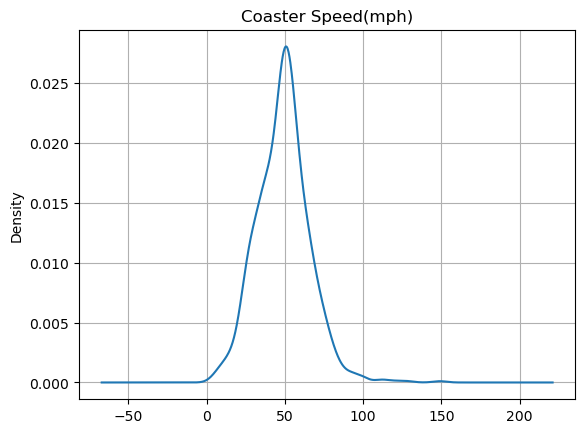

In [29]:
df['Speed_mph'].plot.kde(grid=True, 
                          xlabel='Speed(mph)', 
                          title='Coaster Speed(mph)');


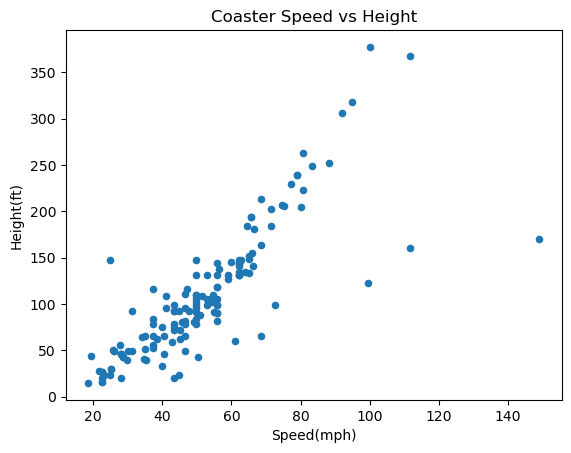

In [30]:
df.plot.scatter(x='Speed_mph', y='Height_ft', title='Coaster Speed vs Height', xlabel='Speed(mph)', ylabel='Height(ft)');

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

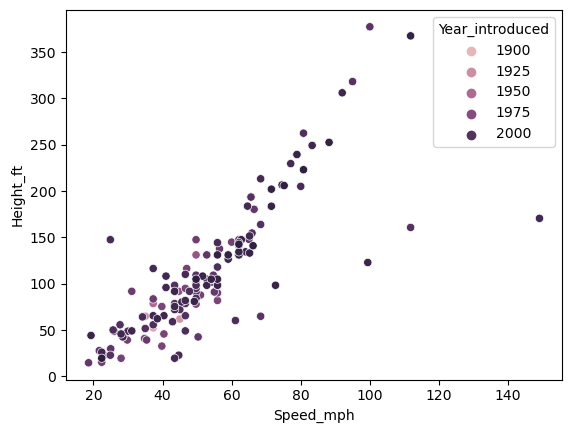

In [31]:
sns.scatterplot(x='Speed_mph', y='Height_ft', data=df, hue='Year_introduced')

In [32]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


C:\Users\mau_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


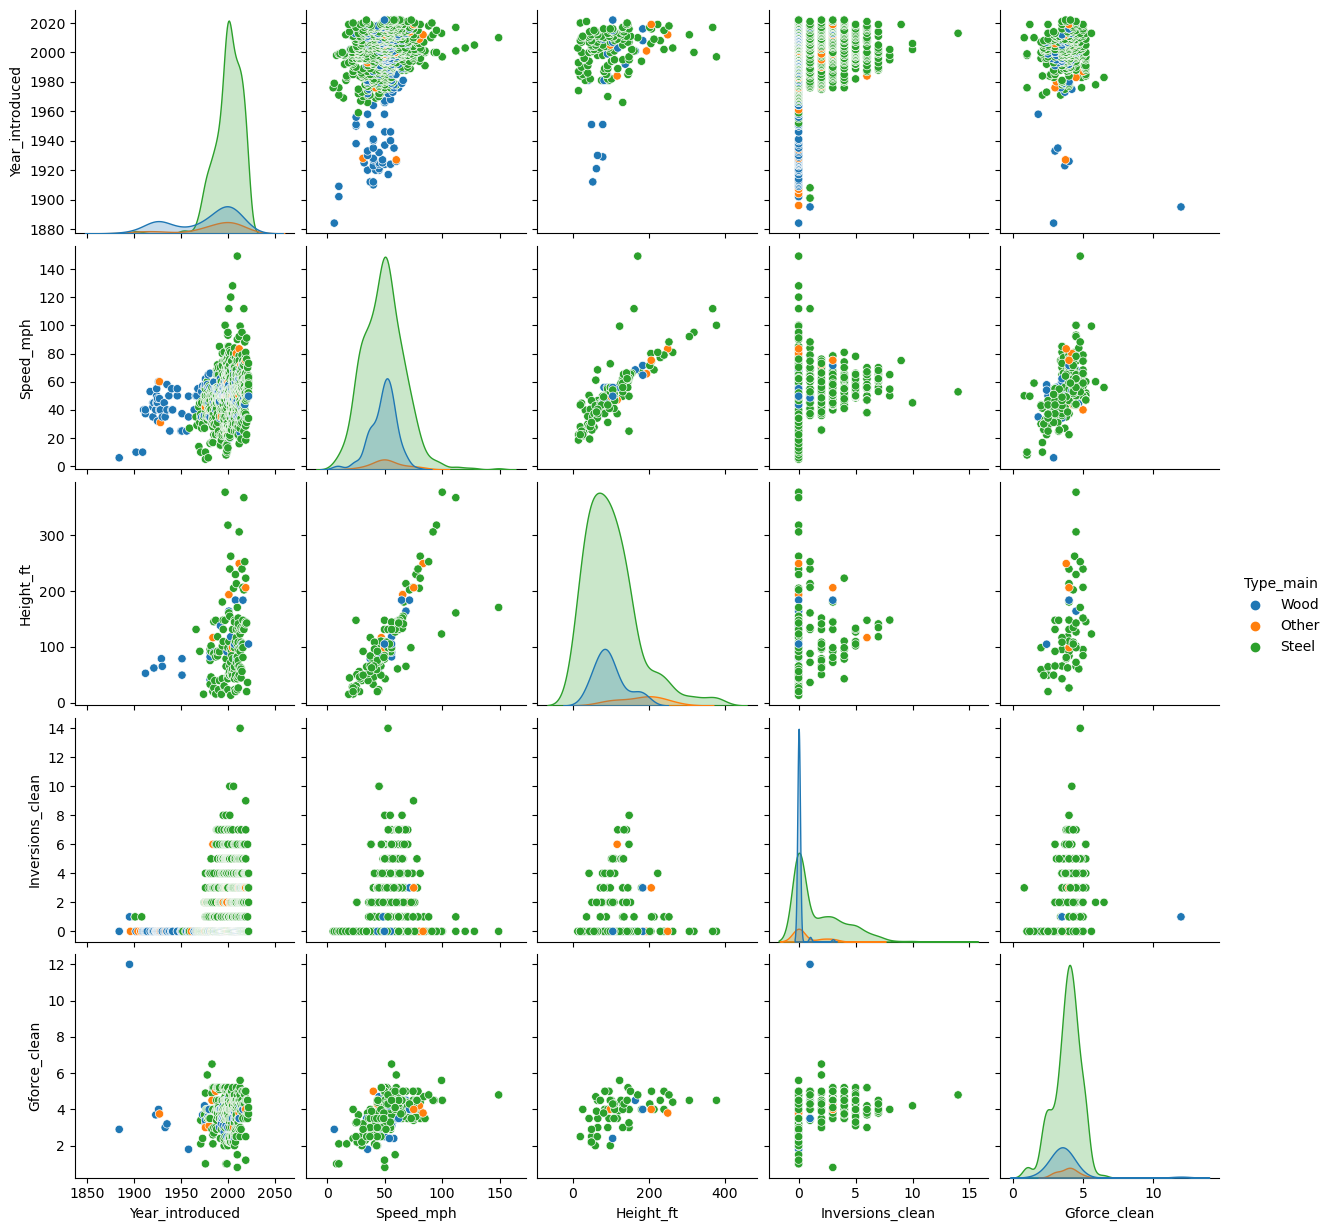

In [33]:
sns.pairplot(df, vars=['Year_introduced', 'Speed_mph', 'Height_ft', 'Inversions_clean', 'Gforce_clean'], 
             hue='Type_main');

**Verificando a correlação entre algumas variáveis**

In [34]:
df[['Year_introduced', 'Speed_mph', 'Height_ft', 'Inversions_clean', 'Gforce_clean']].dropna().corr()

,Year_introduced,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
Year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


**Qual é a localização das Coasters mais rápidas?**

In [42]:
# A localização das  Coasters mais rápidas no geral 
df[['Location', 'Speed_mph']].sort_values(by='Speed_mph', ascending=False).head(10)

,Location,Speed_mph
812,Ferrari World Abu Dhabi,149.1
685,Six Flags Great Adventure,128.0
642,Cedar Point,120.0
569,Fuji-Q Highland,111.8
993,Ferrari Land,111.8
429,Other,100.0
431,Dreamworld,100.0
903,Nürburgring,99.4
553,Nagashima Spa Land,95.0
941,Carowinds,95.0


In [50]:
plt.barh(y='Location')

TypeError: barh() missing 1 required positional argument: 'width'

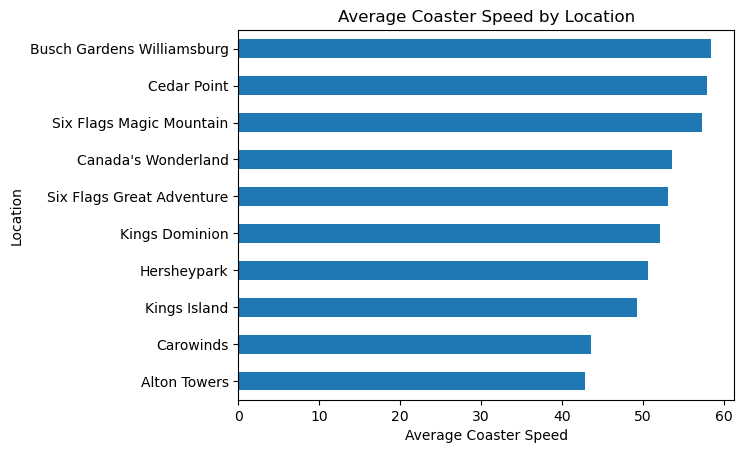

In [39]:
# Localização das Coasters mais rápidas considerando a média das Coasters da região
df.query("Location != 'Other'").groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean')['mean'].plot(kind='barh', title ='Average Coaster Speed by Location', xlabel='Average Coaster Speed');